#### DSC-630-T302
#### Chitramoy Mukherjee
#### Date : 04/04/2024
#### Week3 - Exercise 4.2 - Clustering Exercise

In [103]:
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#### Import the dataset in pandas dataframe and Display the first few rows of the dataset.

In [59]:
df = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-630\\Week-4\\als_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB
None


In [86]:
# ID and SubjectID are the columns definitely not required for further analysis process and can be consdered as irrelevant column.
irrelevant_columns = ['ID', 'SubjectID']

# Remove irrelevant columns
data = df.drop(columns=irrelevant_columns)

# Describe data set post cleanup.
data.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,...,140.145254,136.755061,0.015000,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,...,1.789886,2.715247,0.009283,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,...,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,0.014035,...,139.000000,135.000000,0.010582,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,0.023297,...,140.000000,137.000000,0.013123,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,0.034799,...,141.000000,138.000000,0.017278,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,0.117647,...,146.500000,145.000000,0.142857,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Display basic information about the dataset
print(data.info())
 
# Apply StandardScaler to the numeric features
scaler = StandardScaler()
als_df_cleaned[numeric_features] = scaler.fit_transform(als_df_cleaned[numeric_features])
 
als_df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          2223 non-null   int64  
 1   Albumin_max                       2223 non-null   float64
 2   Albumin_median                    2223 non-null   float64
 3   Albumin_min                       2223 non-null   float64
 4   Albumin_range                     2223 non-null   float64
 5   ALSFRS_slope                      2223 non-null   float64
 6   ALSFRS_Total_max                  2223 non-null   int64  
 7   ALSFRS_Total_median               2223 non-null   float64
 8   ALSFRS_Total_min                  2223 non-null   int64  
 9   ALSFRS_Total_range                2223 non-null   float64
 10  ALT.SGPT._max                     2223 non-null   float64
 11  ALT.SGPT._median                  2223 non-null   float64
 12  ALT.SG

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.992342,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-1.198812,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.595291,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,-0.639992,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,-0.081171,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151


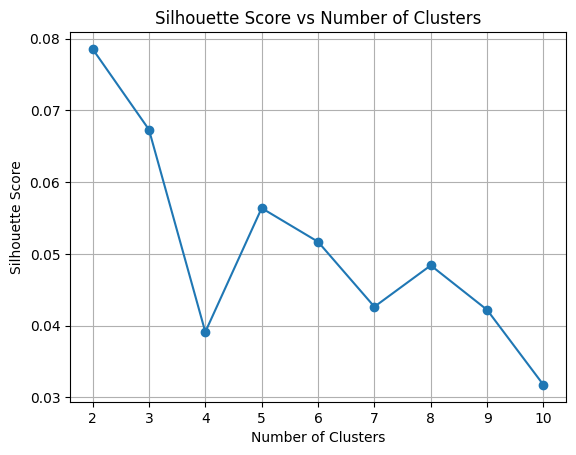

In [98]:
# Initialize lists to store silhouette scores and cluster numbers
silhouette_scores = []
cluster_numbers = range(2, 11)  # Range of cluster numbers to try

# Iterate through each cluster number
for n_clusters in cluster_numbers:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(als_df_cleaned)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(als_df_cleaned, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores versus number of clusters
plt.plot(cluster_numbers, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(cluster_numbers)
plt.grid(True)
plt.show()

In [93]:
# Select the optimal number of clusters based on the plot
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_num_clusters)

Optimal number of clusters: 2


The cluster silhouette score is a metric used to evaluate the quality of clusters in K-means clustering. 
It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters 
(separation). The silhouette score ranges from -1 to 1, where:

A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
A score around 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
A score close to -1 indicates that the object is likely to be assigned to the wrong cluster.

Based on the above plot 2 is the optimal number of cluster as that have the highest silhouette_scores value.

In [100]:
# Optimal number of clusters chosen from silhouette score
optimal_num_clusters = 2

# Fit K-means model with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(als_df_cleaned)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels


Loaded the dataset and preprocess it by scaling the data. Calculated the silhouette scores for different numbers of clusters
and plot them against the number of clusters.Identified the optimal number of clusters based on the plot.
Using K-means model calculate the optimal number of clusters.

In [101]:
# Fit a PCA transformation with two features to the scaled data
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

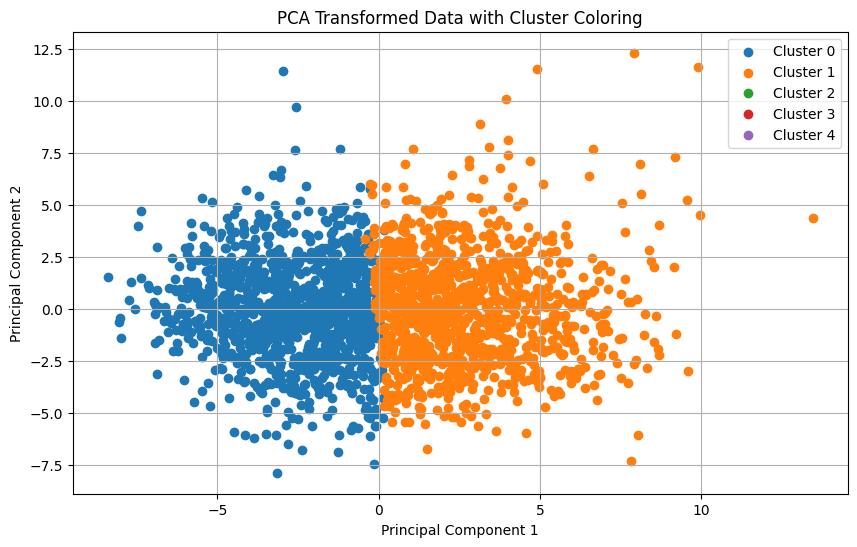

In [102]:
# Create a DataFrame with PCA features and cluster labels
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot scatter plot with cluster coloring
plt.figure(figsize=(10, 6))
for cluster in range(5):  # Adjust based on the number of clusters
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('PCA Transformed Data with Cluster Coloring')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Above code performs all the specified tasks, including data preprocessing, determining the optimal number of clusters, fitting a K-means model, performing PCA transformation, and creating a scatterplot of the PCA-transformed data with cluster coloring.

The scatterplot visualizes the PCA-transformed data, where each point represents a sample from the dataset. The points are colored according to their assigned cluster labels obtained from the K-means clustering algorithm. By examining this plot, we can observe how well the clusters are separated in the reduced feature space (PCA components 1 and 2). If the clusters are well-separated, it indicates that the K-means algorithm has successfully grouped similar samples together. On the other hand, if the clusters overlap significantly, it suggests that the algorithm may not have effectively captured the underlying structure of the data. This visualization provides insights into the distribution and separation of clusters, aiding in the interpretation and evaluation of the clustering results.